#### Corp Yield model

In [5]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
from sklearn.preprocessing import StandardScaler,PolynomialFeatures;
from sklearn.model_selection import train_test_split;
from sklearn.linear_model import LinearRegression,LassoCV,RidgeCV;
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score;
import pickle;

In [2]:
df=pd.read_csv('corp_data.csv')
df.head()

,Fertilizer_kg,Water_L,Crop_Yield_kg
0,10,50,45.2
1,12,52,50.8
2,15,55,60.1
3,18,58,68.4
4,20,60,72.5


In [4]:
df.isnull().sum()

Fertilizer_kg    0
Water_L          0
Crop_Yield_kg    0
dtype: int64

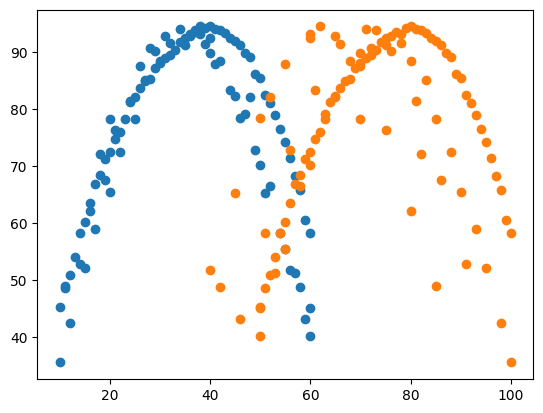

In [10]:
plt.scatter(df['Fertilizer_kg'],df['Crop_Yield_kg'])
plt.scatter(df['Water_L'],df['Crop_Yield_kg'])

In [11]:
df.corr()

,Fertilizer_kg,Water_L,Crop_Yield_kg
Fertilizer_kg,1.000000,0.019843,0.126031
Water_L,0.019843,1.000000,0.194545
Crop_Yield_kg,0.126031,0.194545,1.000000


In [12]:
x=df.drop(columns=['Crop_Yield_kg'],axis=1)

In [14]:
y=df['Crop_Yield_kg']

In [15]:
y.head()

0    45.2
1    50.8
2    60.1
3    68.4
4    72.5
Name: Crop_Yield_kg, dtype: float64

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [19]:
scalar=StandardScaler();
x_train_scaled=scalar.fit_transform(x_train)
x_test_scaled=scalar.transform(x_test)

mse : 182.3935477508581
mae : 12.507338094839817
rmse : 13.505315536886137
score : -18.821619352731485
adjusted R : -20.623584748434347


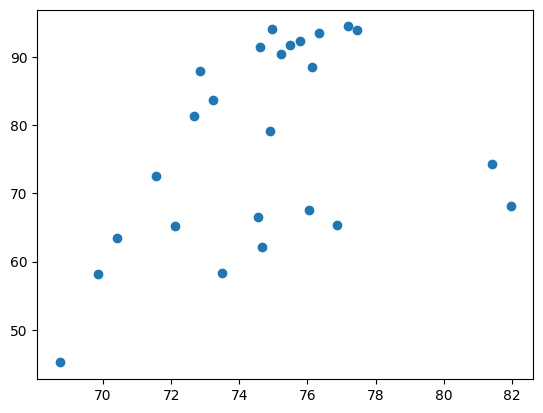

In [23]:
##### linear regression

lin_reg=LinearRegression(n_jobs=-1)
lin_reg.fit(x_train_scaled,y_train)
y_lin_reg_pred=lin_reg.predict(x_test_scaled)
mse=mean_squared_error(y_lin_reg_pred,y_test)
mae=mean_absolute_error(y_lin_reg_pred,y_test)
rmse=np.sqrt(mse)
score=r2_score(y_lin_reg_pred,y_test)
adjr=1-((1-score)*(len(x_test)-1))/(len(x_test)-x_test.shape[1]-1)
print(f'mse : {mse}')
print(f'mae : {mae}')
print(f'rmse : {rmse}')
print(f'score : {score}')
print(f'adjusted R : {adjr}')
plt.scatter(y_lin_reg_pred,y_test)


In [25]:
poly=PolynomialFeatures(degree=2)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)

mse : 3.8061463996826657
mae : 1.4306656492048575
rmse : 1.9509347502370924
score : 0.9799334520138909
adjusted R : 0.9781092203787901


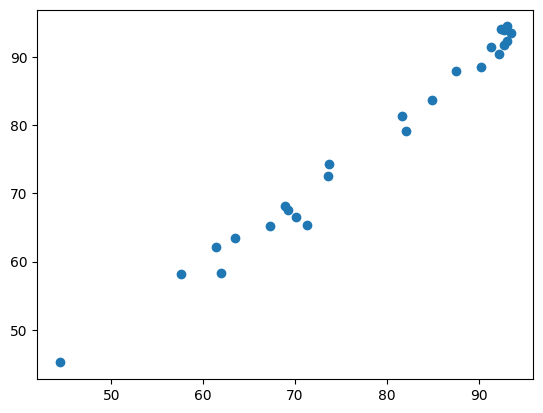

In [28]:
### polynomial linear regression 

polylin_reg=LinearRegression(n_jobs=-1)
polylin_reg.fit(x_train_poly,y_train)
y_polylin_reg_pred=polylin_reg.predict(x_test_poly)
mse=mean_squared_error(y_polylin_reg_pred,y_test)
mae=mean_absolute_error(y_polylin_reg_pred,y_test)
rmse=np.sqrt(mse)
score=r2_score(y_polylin_reg_pred,y_test)
adjr=1-((1-score)*(len(x_test)-1))/(len(x_test)-x_test.shape[1]-1)
print(f'mse : {mse}')
print(f'mae : {mae}')
print(f'rmse : {rmse}')
print(f'score : {score}')
print(f'adjusted R : {adjr}')
plt.scatter(y_polylin_reg_pred,y_test)

mse : 10.22461827291646
mae : 2.5882660870663896
rmse : 3.197595701916748
score : 0.9227200790615991
adjusted R : 0.9156946317035627


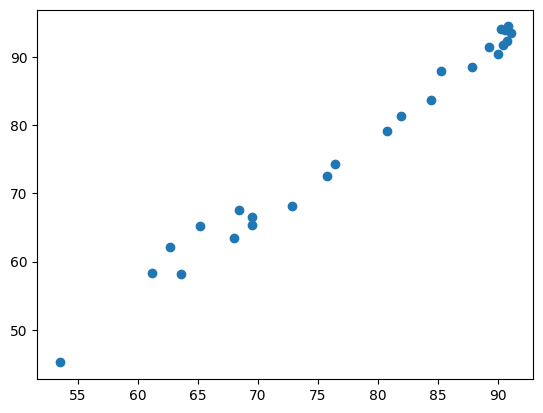

In [29]:
### polynomial linear regression with LassoCV

poly_lassocv=LassoCV(cv=5)
poly_lassocv.fit(x_train_poly,y_train)
y_poly_lassocv_pred=poly_lassocv.predict(x_test_poly)
mse=mean_squared_error(y_poly_lassocv_pred,y_test)
mae=mean_absolute_error(y_poly_lassocv_pred,y_test)
rmse=np.sqrt(mse)
score=r2_score(y_poly_lassocv_pred,y_test)
adjr=1-((1-score)*(len(x_test)-1))/(len(x_test)-x_test.shape[1]-1)
print(f'mse : {mse}')
print(f'mae : {mae}')
print(f'rmse : {rmse}')
print(f'score : {score}')
print(f'adjusted R : {adjr}')
plt.scatter(y_poly_lassocv_pred,y_test)

mse : 3.631413507057212
mae : 1.3766188349564104
rmse : 1.905626801621244
score : 0.9801659187686504
adjusted R : 0.9783628204748914


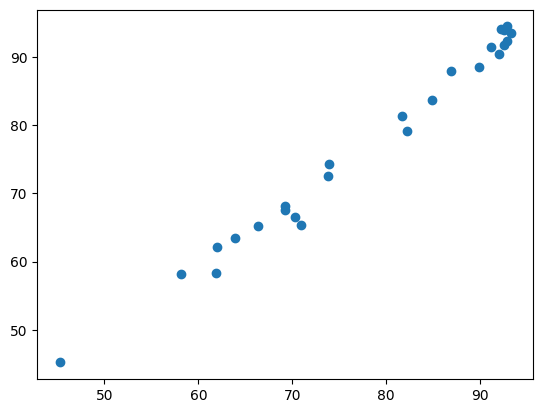

In [30]:
### polynomial linear regression with ridgecv

poly_ridgecv=RidgeCV(cv=5)
poly_ridgecv.fit(x_train_poly,y_train)
y_poly_ridgecv_pred=poly_ridgecv.predict(x_test_poly)
mse=mean_squared_error(y_poly_ridgecv_pred,y_test)
mae=mean_absolute_error(y_poly_ridgecv_pred,y_test)
rmse=np.sqrt(mse)
score=r2_score(y_poly_ridgecv_pred,y_test)
adjr=1-((1-score)*(len(x_test)-1))/(len(x_test)-x_test.shape[1]-1)
print(f'mse : {mse}')
print(f'mae : {mae}')
print(f'rmse : {rmse}')
print(f'score : {score}')
print(f'adjusted R : {adjr}')
plt.scatter(y_poly_ridgecv_pred,y_test)